# Mock data

No handles with labels found to put in legend.


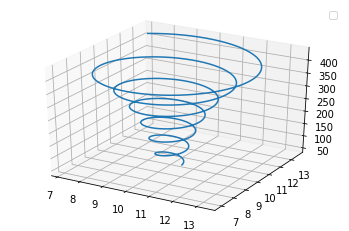

In [10]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from math import exp,sin,cos
from pylab import *
from sklearn.preprocessing import scale


mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
a=0.05
b=0.05
# took the liberty of reducing the max value for th 
# as it was giving you values of the order of e42
th=np.linspace(0, 40, 10000)  
x=10*a*exp(b*th)*cos(th) + 10
y=10*a*exp(b*th)*sin(th) + 10
z=10*th + 40  # creating the z array with the same length as th
ax.plot(x, y, z)  # adding z as an argument for the plot
ax.legend()

plt.show()

# Reshape data 

In [11]:
x = np.reshape(x,(x.shape[0],1))
y = np.reshape(y,(y.shape[0],1))
z = np.reshape(z,(z.shape[0],1))
th = np.reshape(th,(th.shape[0],1))

# Normalize and Concatenate data

In [12]:
x = scale(x)
y = scale(y)
z = scale(z)
th = scale(th)

In [13]:
x_final = x[0:x.shape[0]-2,:]
y_final = y[0:y.shape[0]-2,:]
z_final = z[0:z.shape[0]-2,:]
th_final = th[1:th.shape[0]-1,:]

x_train_final = x[1:x.shape[0]-1,:]
y_train_final = y[1:y.shape[0]-1,:]
z_train_final = z[1:z.shape[0]-1,:]

In [14]:
xy = np.concatenate((x_final, y_final), axis=1)
xyz = np.concatenate((xy, z_final), axis=1)
X = np.concatenate((xyz, th_final), axis=1)

In [15]:
xy_train = np.concatenate((x_train_final, y_train_final), axis=1)
Y = np.concatenate((xy_train, z_train_final), axis=1)

### sanity check

In [16]:
X.shape, Y.shape

((9998, 4), (9998, 3))

# Model architecture

In [17]:
from keras.layers import Dense
from keras.layers import LSTM

from keras.models import Sequential

model = Sequential()

model.add(Dense(16, input_dim = 4, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(3))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# Train model

In [18]:
model.fit(X,Y, epochs=100)

Epoch 1/100
9998/9998 [==============================] - 1s 55us/step - loss: 0.3419 - acc: 0.6764
Epoch 2/100
9998/9998 [==============================] - 0s 33us/step - loss: 0.0087 - acc: 0.9642
Epoch 3/100
9998/9998 [==============================] - 0s 35us/step - loss: 0.0035 - acc: 0.9756
Epoch 4/100
9998/9998 [==============================] - 0s 44us/step - loss: 0.0023 - acc: 0.9781
Epoch 5/100
9998/9998 [==============================] - 0s 43us/step - loss: 0.0017 - acc: 0.9815
Epoch 6/100
9998/9998 [==============================] - 0s 33us/step - loss: 0.0014 - acc: 0.9832
Epoch 7/100
9998/9998 [==============================] - 0s 35us/step - loss: 0.0011 - acc: 0.9861
Epoch 8/100
9998/9998 [==============================] - 0s 33us/step - loss: 9.3570e-04 - acc: 0.9882
Epoch 9/100
9998/9998 [==============================] - 0s 34us/step - loss: 7.9988e-04 - acc: 0.9904
Epoch 10/100
9998/9998 [==============================] - 0s 34us/step - loss: 6.9500e-04 - acc: 0.99

9998/9998 [==============================] - 0s 31us/step - loss: 4.4470e-06 - acc: 0.9987
Epoch 81/100
9998/9998 [==============================] - 0s 31us/step - loss: 4.9886e-06 - acc: 0.9986
Epoch 82/100
9998/9998 [==============================] - 0s 31us/step - loss: 5.5630e-06 - acc: 0.9987
Epoch 83/100
9998/9998 [==============================] - 0s 29us/step - loss: 3.6229e-06 - acc: 0.9994
Epoch 84/100
9998/9998 [==============================] - 0s 30us/step - loss: 5.9103e-06 - acc: 0.9992
Epoch 85/100
9998/9998 [==============================] - 0s 33us/step - loss: 7.8327e-06 - acc: 0.9989
Epoch 86/100
9998/9998 [==============================] - 0s 33us/step - loss: 2.4872e-06 - acc: 0.9991
Epoch 87/100
9998/9998 [==============================] - 0s 35us/step - loss: 3.9229e-06 - acc: 0.9993
Epoch 88/100
9998/9998 [==============================] - 0s 32us/step - loss: 2.9094e-06 - acc: 0.9992
Epoch 89/100
9998/9998 [==============================] - 0s 31us/step - loss